# 데이터 결합

In [1]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

In [2]:
import pandas as pd
df = pd.read_csv('2021_2022_강남구전세실거래가.csv', usecols = ['시군구', '단지명', '전용면적(㎡)', '보증금(만원)','층','도로명','계약년월','계약일','계약기간','전월세구분','건축년도','구분'])
df

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,도로명,계약기간,구분,단지명,전용면적(㎡),층
0,서울특별시 강남구 개포동,월세,202204,11,500,1996.0,NaN,-,단독다가구,NaN,NaN,NaN
1,서울특별시 강남구 개포동,월세,202204,11,500,1996.0,논현로8길,202204~202404,단독다가구,NaN,NaN,NaN
2,서울특별시 강남구 개포동,월세,202208,24,500,1996.0,논현로8길,-,단독다가구,NaN,NaN,NaN
3,서울특별시 강남구 개포동,월세,202212,7,"1,000",1990.0,개포로15길,202212~202308,단독다가구,NaN,NaN,NaN
4,서울특별시 강남구 개포동,월세,202204,8,500,1992.0,개포로17길,202204~202304,단독다가구,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
77820,서울특별시 강남구 청담동,전세,202210,7,"64,000",2019.0,영동대로 740,202211~202411,오피스텔,더 리버스 청담,45.09,6.0
77821,서울특별시 강남구 청담동,월세,202211,8,"10,000",2019.0,영동대로 740,202211~202309,오피스텔,더 리버스 청담,45.09,6.0
77822,서울특별시 강남구 청담동,월세,202204,1,"1,000",2018.0,도산대로 419,202204~202303,오피스텔,아노블리81,59.95,9.0
77823,서울특별시 강남구 청담동,월세,202208,5,"10,000",2018.0,도산대로 419,202208~202308,오피스텔,아노블리81,59.97,12.0


In [3]:
df.drop(df[df['전월세구분'] == '월세'].index, inplace=True)
df

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,도로명,계약기간,구분,단지명,전용면적(㎡),층
14,서울특별시 강남구 개포동,전세,202212,20,"9,000",1988.0,NaN,-,단독다가구,NaN,NaN,NaN
30,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,논현로4길,202206~202406,단독다가구,NaN,NaN,NaN
32,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,논현로10길,202205~202405,단독다가구,NaN,NaN,NaN
36,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,개포로20길,202202~202402,단독다가구,NaN,NaN,NaN
46,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,개포로15길,-,단독다가구,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
77810,서울특별시 강남구 청담동,전세,202205,24,"14,000",1991.0,도산대로 446,202206~202406,오피스텔,경원오피스텔,22.77,7.0
77811,서울특별시 강남구 청담동,전세,202206,27,"17,000",1991.0,도산대로 446,202207~202407,오피스텔,경원오피스텔,22.77,9.0
77814,서울특별시 강남구 청담동,전세,202202,17,"67,200",2019.0,영동대로 740,202203~202303,오피스텔,더 리버스 청담,45.09,7.0
77819,서울특별시 강남구 청담동,전세,202208,11,"84,000",2019.0,영동대로 740,202209~202409,오피스텔,더 리버스 청담,45.09,17.0


In [4]:
df1 = pd.read_csv('18_19_20_강남구전세실거래가.csv',  usecols = ['시군구', '단지명', '전용면적(㎡)', '보증금(만원)','층','도로명','계약년월','계약일','계약기간','전월세구분','건축년도','구분'])
df1

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,도로명,계약기간,구분,단지명,전용면적(㎡),층
0,서울특별시 강남구 개포동,월세,201804,25,500,1998.0,개포로20길,-,단독다가구,NaN,NaN,NaN
1,서울특별시 강남구 개포동,월세,201804,12,"2,000",1989.0,NaN,-,단독다가구,NaN,NaN,NaN
2,서울특별시 강남구 개포동,월세,201802,24,500,1990.0,개포로15길,-,단독다가구,NaN,NaN,NaN
3,서울특별시 강남구 개포동,월세,201807,30,600,1993.0,개포로25길,-,단독다가구,NaN,NaN,NaN
4,서울특별시 강남구 개포동,월세,201806,2,500,1991.0,NaN,-,단독다가구,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
89844,서울특별시 강남구 청담동,월세,202007,9,"10,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,13.0
89845,서울특별시 강남구 청담동,월세,202007,22,"25,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,12.0
89846,서울특별시 강남구 청담동,전세,202008,4,"80,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,17.0
89847,서울특별시 강남구 청담동,월세,202012,30,"70,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,16.0


In [5]:
df2 = pd.concat([df, df1], ignore_index=True)
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,도로명,계약기간,구분,단지명,전용면적(㎡),층
0,서울특별시 강남구 개포동,전세,202212,20,"9,000",1988.0,NaN,-,단독다가구,NaN,NaN,NaN
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,논현로4길,202206~202406,단독다가구,NaN,NaN,NaN
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,논현로10길,202205~202405,단독다가구,NaN,NaN,NaN
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,개포로20길,202202~202402,단독다가구,NaN,NaN,NaN
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,개포로15길,-,단독다가구,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
126776,서울특별시 강남구 청담동,월세,202007,9,"10,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,13.0
126777,서울특별시 강남구 청담동,월세,202007,22,"25,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,12.0
126778,서울특별시 강남구 청담동,전세,202008,4,"80,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,17.0
126779,서울특별시 강남구 청담동,월세,202012,30,"70,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,16.0


In [6]:
def transform_address(address):
    address_parts = address.split(' ')
    return ' '.join(address_parts[:2])

# Apply the function to the '시군구' column using apply()
df2['시군구1'] = df2['시군구'].apply(transform_address)

df2

df2['도로명주소'] = df2['시군구1'] + ' ' + df2['도로명']
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,도로명,계약기간,구분,단지명,전용면적(㎡),층,시군구1,도로명주소
0,서울특별시 강남구 개포동,전세,202212,20,"9,000",1988.0,NaN,-,단독다가구,NaN,NaN,NaN,서울특별시 강남구,NaN
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,논현로4길,202206~202406,단독다가구,NaN,NaN,NaN,서울특별시 강남구,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,논현로10길,202205~202405,단독다가구,NaN,NaN,NaN,서울특별시 강남구,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,개포로20길,202202~202402,단독다가구,NaN,NaN,NaN,서울특별시 강남구,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,개포로15길,-,단독다가구,NaN,NaN,NaN,서울특별시 강남구,서울특별시 강남구 개포로15길
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126776,서울특별시 강남구 청담동,월세,202007,9,"10,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,13.0,서울특별시 강남구,서울특별시 강남구 영동대로 740
126777,서울특별시 강남구 청담동,월세,202007,22,"25,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,12.0,서울특별시 강남구,서울특별시 강남구 영동대로 740
126778,서울특별시 강남구 청담동,전세,202008,4,"80,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,17.0,서울특별시 강남구,서울특별시 강남구 영동대로 740
126779,서울특별시 강남구 청담동,월세,202012,30,"70,000",2019.0,영동대로 740,-,오피스텔,더 리버스 청담,45.09,16.0,서울특별시 강남구,서울특별시 강남구 영동대로 740


In [7]:
df2.drop('시군구1', axis=1, inplace=True)
df2.drop('도로명', axis=1, inplace=True)
df2.drop('단지명', axis=1, inplace=True)

df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,계약기간,구분,전용면적(㎡),층,도로명주소
0,서울특별시 강남구 개포동,전세,202212,20,"9,000",1988.0,-,단독다가구,NaN,NaN,NaN
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,202206~202406,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,202205~202405,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,202202~202402,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,-,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길
...,...,...,...,...,...,...,...,...,...,...,...
126776,서울특별시 강남구 청담동,월세,202007,9,"10,000",2019.0,-,오피스텔,45.09,13.0,서울특별시 강남구 영동대로 740
126777,서울특별시 강남구 청담동,월세,202007,22,"25,000",2019.0,-,오피스텔,45.09,12.0,서울특별시 강남구 영동대로 740
126778,서울특별시 강남구 청담동,전세,202008,4,"80,000",2019.0,-,오피스텔,45.09,17.0,서울특별시 강남구 영동대로 740
126779,서울특별시 강남구 청담동,월세,202012,30,"70,000",2019.0,-,오피스텔,45.09,16.0,서울특별시 강남구 영동대로 740


In [8]:
df2['도로명주소'].isnull().sum()

1886

In [9]:
df2.dropna(subset=['도로명주소'], inplace=True)
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,계약기간,구분,전용면적(㎡),층,도로명주소
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,202206~202406,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,202205~202405,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,202202~202402,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,-,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길
5,서울특별시 강남구 개포동,전세,202206,25,"8,000",1995.0,202207~202407,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길
...,...,...,...,...,...,...,...,...,...,...,...
126776,서울특별시 강남구 청담동,월세,202007,9,"10,000",2019.0,-,오피스텔,45.09,13.0,서울특별시 강남구 영동대로 740
126777,서울특별시 강남구 청담동,월세,202007,22,"25,000",2019.0,-,오피스텔,45.09,12.0,서울특별시 강남구 영동대로 740
126778,서울특별시 강남구 청담동,전세,202008,4,"80,000",2019.0,-,오피스텔,45.09,17.0,서울특별시 강남구 영동대로 740
126779,서울특별시 강남구 청담동,월세,202012,30,"70,000",2019.0,-,오피스텔,45.09,16.0,서울특별시 강남구 영동대로 740


In [10]:
df2.drop(df2[df2['전월세구분'] == "월세"].index, inplace=True)
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,계약기간,구분,전용면적(㎡),층,도로명주소
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989.0,202206~202406,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994.0,202205~202405,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",NaN,202202~202402,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989.0,-,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길
5,서울특별시 강남구 개포동,전세,202206,25,"8,000",1995.0,202207~202407,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길
...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,202004,11,"10,000",2003.0,-,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6
126768,서울특별시 강남구 청담동,전세,202007,8,"10,500",2003.0,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126769,서울특별시 강남구 청담동,전세,202007,24,"11,000",2003.0,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126772,서울특별시 강남구 청담동,전세,202009,25,"13,000",1991.0,-,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446


In [11]:
df2['도로명주소'].isnull().sum()

0

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87367 entries, 1 to 126778
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      87367 non-null  object 
 1   전월세구분    87367 non-null  object 
 2   계약년월     87367 non-null  int64  
 3   계약일      87367 non-null  int64  
 4   보증금(만원)  87367 non-null  object 
 5   건축년도     86486 non-null  float64
 6   계약기간     87367 non-null  object 
 7   구분       87367 non-null  object 
 8   전용면적(㎡)  77889 non-null  float64
 9   층        77889 non-null  float64
 10  도로명주소    87367 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 8.0+ MB


# 데이터전처리(null)

In [13]:
df2.isnull().sum()
# 건축년도 평균값 

시군구           0
전월세구분         0
계약년월          0
계약일           0
보증금(만원)       0
건축년도        881
계약기간          0
구분            0
전용면적(㎡)    9478
층          9478
도로명주소         0
dtype: int64

In [14]:
df2.info()
# 계약년월 datetime 변환
# object float값으로
# 계약기간(전), (후)
# 전용면적 수치형

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87367 entries, 1 to 126778
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      87367 non-null  object 
 1   전월세구분    87367 non-null  object 
 2   계약년월     87367 non-null  int64  
 3   계약일      87367 non-null  int64  
 4   보증금(만원)  87367 non-null  object 
 5   건축년도     86486 non-null  float64
 6   계약기간     87367 non-null  object 
 7   구분       87367 non-null  object 
 8   전용면적(㎡)  77889 non-null  float64
 9   층        77889 non-null  float64
 10  도로명주소    87367 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 8.0+ MB


In [15]:
df2.describe()

,계약년월,계약일,건축년도,전용면적(㎡),층
count,87367.000000,87367.000000,86486.000000,77889.000000,77889.000000
mean,202013.994540,16.015326,2000.435203,70.668011,7.329315
std,143.036714,8.664991,14.572502,38.387808,5.929395
min,201801.000000,1.000000,1111.000000,11.390000,-1.000000
25%,201904.000000,9.000000,1992.000000,39.510000,3.000000
50%,202007.000000,16.000000,2002.000000,63.870000,6.000000
75%,202111.000000,23.000000,2013.000000,84.970000,10.000000
max,202212.000000,31.000000,2023.000000,301.470000,67.000000


## 건축년도 처리

In [16]:
# Assuming you have imported pandas and created the DataFrame df2

# Drop rows where '건축년도' is equal to 1111.0
df2 = df2[df2['건축년도'] != 1111.0]


In [17]:
df2.isnull().sum()

시군구           0
전월세구분         0
계약년월          0
계약일           0
보증금(만원)       0
건축년도        881
계약기간          0
구분            0
전용면적(㎡)    9472
층          9472
도로명주소         0
dtype: int64

In [18]:
df2['건축년도'].mean()

2000.4969125809437

In [19]:
# 건축년도를 int형으로..
df2['건축년도'].fillna(df2['건축년도'].mean(), inplace=True)
df2['건축년도'] = df2['건축년도'].astype(int)
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,계약기간,구분,전용면적(㎡),층,도로명주소
1,서울특별시 강남구 개포동,전세,202206,1,"7,500",1989,202206~202406,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,"11,000",1994,202205~202405,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,"16,800",2000,202202~202402,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,"13,000",1989,-,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길
5,서울특별시 강남구 개포동,전세,202206,25,"8,000",1995,202207~202407,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길
...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,202004,11,"10,000",2003,-,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6
126768,서울특별시 강남구 청담동,전세,202007,8,"10,500",2003,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126769,서울특별시 강남구 청담동,전세,202007,24,"11,000",2003,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126772,서울특별시 강남구 청담동,전세,202009,25,"13,000",1991,-,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87361 entries, 1 to 126778
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      87361 non-null  object 
 1   전월세구분    87361 non-null  object 
 2   계약년월     87361 non-null  int64  
 3   계약일      87361 non-null  int64  
 4   보증금(만원)  87361 non-null  object 
 5   건축년도     87361 non-null  int64  
 6   계약기간     87361 non-null  object 
 7   구분       87361 non-null  object 
 8   전용면적(㎡)  77889 non-null  float64
 9   층        77889 non-null  float64
 10  도로명주소    87361 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.0+ MB


## 보증금 처리

In [21]:
# int형으로 변환
df2['보증금(만원)'] = pd.to_numeric(df2['보증금(만원)'].str.replace(',', ''), errors='coerce')


In [22]:
df2 

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,계약기간,구분,전용면적(㎡),층,도로명주소
1,서울특별시 강남구 개포동,전세,202206,1,7500,1989,202206~202406,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길
2,서울특별시 강남구 개포동,전세,202205,20,11000,1994,202205~202405,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길
3,서울특별시 강남구 개포동,전세,202201,22,16800,2000,202202~202402,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길
4,서울특별시 강남구 개포동,전세,202202,18,13000,1989,-,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길
5,서울특별시 강남구 개포동,전세,202206,25,8000,1995,202207~202407,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길
...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,202004,11,10000,2003,-,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6
126768,서울특별시 강남구 청담동,전세,202007,8,10500,2003,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126769,서울특별시 강남구 청담동,전세,202007,24,11000,2003,-,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6
126772,서울특별시 강남구 청담동,전세,202009,25,13000,1991,-,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446


In [23]:
# 계약기간 시작 종료로 나누기
df2['계약시작'] = pd.to_datetime(df2['계약기간'].str.split('~', expand=True)[0], format='%Y%m', errors='coerce')
df2['계약종료'] = pd.to_datetime(df2['계약기간'].str.split('~', expand=True)[1], format='%Y%m', errors='coerce')

# 계약기간 컬럼 버리기
df2.drop('계약기간', axis=1, inplace=True)
df2

,시군구,전월세구분,계약년월,계약일,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료
1,서울특별시 강남구 개포동,전세,202206,1,7500,1989,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01
2,서울특별시 강남구 개포동,전세,202205,20,11000,1994,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01
3,서울특별시 강남구 개포동,전세,202201,22,16800,2000,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01
4,서울특별시 강남구 개포동,전세,202202,18,13000,1989,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길,NaT,NaT
5,서울특별시 강남구 개포동,전세,202206,25,8000,1995,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,202004,11,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT
126768,서울특별시 강남구 청담동,전세,202007,8,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT
126769,서울특별시 강남구 청담동,전세,202007,24,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT
126772,서울특별시 강남구 청담동,전세,202009,25,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT


In [24]:
import pandas as pd

# Assuming df2 is your DataFrame containing '계약년월' and '계약일' columns
# Sample data:
# df2 = pd.DataFrame({'계약년월': [2023, 2023], '계약일': [15, 20]})

# Convert '계약년월' column to string
df2['계약년월'] = df2['계약년월'].astype(str)

# Concatenate '계약년월' and '계약일' columns
df2['계약년월일'] = df2['계약년월'] + '-' + df2['계약일'].astype(str)

# Convert the new '계약일' column to datetime with the correct format
df2['계약년월일'] = pd.to_datetime(df2['계약년월일'], format='%Y%m-%d')

# Drop the original '계약년월' column if needed
df2.drop(['계약년월'], axis=1, inplace=True)
df2.drop(['계약일'], axis=1, inplace=True)
df2

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일
1,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,NaN,NaN,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01
2,서울특별시 강남구 개포동,전세,11000,1994,단독다가구,NaN,NaN,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01,2022-05-20
3,서울특별시 강남구 개포동,전세,16800,2000,단독다가구,NaN,NaN,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01,2022-01-22
4,서울특별시 강남구 개포동,전세,13000,1989,단독다가구,NaN,NaN,서울특별시 강남구 개포로15길,NaT,NaT,2022-02-18
5,서울특별시 강남구 개포동,전세,8000,1995,단독다가구,NaN,NaN,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01,2022-06-25
...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-04-11
126768,서울특별시 강남구 청담동,전세,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-08
126769,서울특별시 강남구 청담동,전세,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-24
126772,서울특별시 강남구 청담동,전세,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT,2020-09-25


## 전용면적 전처리
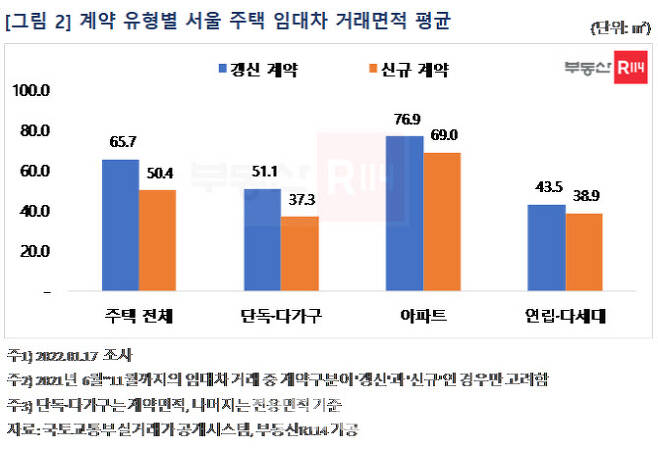

In [25]:
df2.groupby('구분').apply(lambda x: x.isnull().sum())

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일
구분,,,,,,,,,,,
단독다가구,0,0,0,0,0,9472,9472,0,6769,6769,0
아파트,0,0,0,0,0,0,0,0,38496,38496,0
연립다세대,0,0,0,0,0,0,0,0,11290,11290,0
오피스텔,0,0,0,0,0,0,0,0,5737,5737,0


In [26]:
# 전용면적 전처리
# 대부분 Null값은 단독다가구
df2['전용면적(㎡)'].isna().sum()

9472

In [27]:
import pandas as pd

# df2['구분'] 컬럼의 Null 값을 갱신계약과 신규계약의 평균인 44로 채우기(다가구 한정))
df2['전용면적(㎡)'] = df2['전용면적(㎡)'].fillna(44)

In [28]:
df2

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일
1,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,NaN,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01
2,서울특별시 강남구 개포동,전세,11000,1994,단독다가구,44.00,NaN,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01,2022-05-20
3,서울특별시 강남구 개포동,전세,16800,2000,단독다가구,44.00,NaN,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01,2022-01-22
4,서울특별시 강남구 개포동,전세,13000,1989,단독다가구,44.00,NaN,서울특별시 강남구 개포로15길,NaT,NaT,2022-02-18
5,서울특별시 강남구 개포동,전세,8000,1995,단독다가구,44.00,NaN,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01,2022-06-25
...,...,...,...,...,...,...,...,...,...,...,...
126767,서울특별시 강남구 청담동,전세,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-04-11
126768,서울특별시 강남구 청담동,전세,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-08
126769,서울특별시 강남구 청담동,전세,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-24
126772,서울특별시 강남구 청담동,전세,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT,2020-09-25


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87361 entries, 1 to 126778
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시군구      87361 non-null  object        
 1   전월세구분    87361 non-null  object        
 2   보증금(만원)  87361 non-null  int64         
 3   건축년도     87361 non-null  int64         
 4   구분       87361 non-null  object        
 5   전용면적(㎡)  87361 non-null  float64       
 6   층        77889 non-null  float64       
 7   도로명주소    87361 non-null  object        
 8   계약시작     25069 non-null  datetime64[ns]
 9   계약종료     25069 non-null  datetime64[ns]
 10  계약년월일    87361 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 8.0+ MB


## 층 전처리
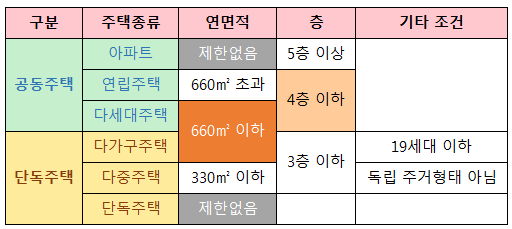
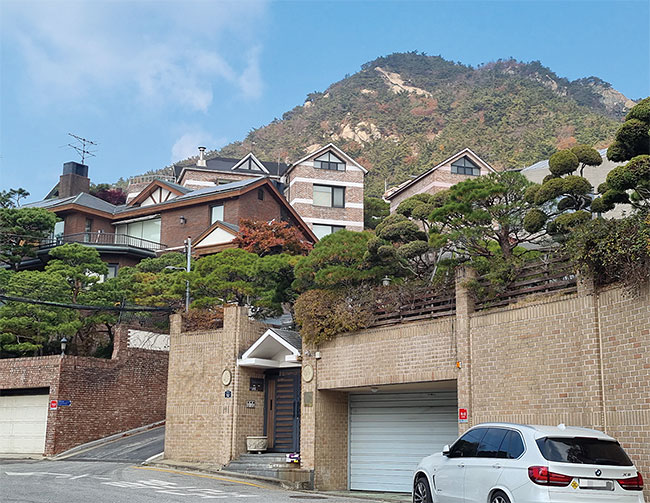
- 대부분 층의 Null값은 단독다가구 
- 용적률 고려시 대부분 3층 단독다가구. 다가구가 아닐 경우 1층도 더러있음.
- 하지만 금싸라기 강남구는 용적률때문에 3층이 많을거라고 가정
- 부동산뱅크나 직방등등... 부동산 사이트 조사결과 대부분 3/4층 (4층은 주차장 포함)

In [30]:
df2['층'] = df2['층'].fillna(3)

In [31]:
df2.reset_index(drop=True, inplace=True)
df2

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일
0,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01
1,서울특별시 강남구 개포동,전세,11000,1994,단독다가구,44.00,3.0,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01,2022-05-20
2,서울특별시 강남구 개포동,전세,16800,2000,단독다가구,44.00,3.0,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01,2022-01-22
3,서울특별시 강남구 개포동,전세,13000,1989,단독다가구,44.00,3.0,서울특별시 강남구 개포로15길,NaT,NaT,2022-02-18
4,서울특별시 강남구 개포동,전세,8000,1995,단독다가구,44.00,3.0,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01,2022-06-25
...,...,...,...,...,...,...,...,...,...,...,...
87356,서울특별시 강남구 청담동,전세,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-04-11
87357,서울특별시 강남구 청담동,전세,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-08
87358,서울특별시 강남구 청담동,전세,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-24
87359,서울특별시 강남구 청담동,전세,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT,2020-09-25


## '강남구'칼럼 따로빼기

In [32]:
import re
import pandas as pd

def extract_gu_from_address(address):
    if isinstance(address, str):  # Check if address is a string
        pattern = r'\s(\S+)'
        result = re.search(pattern, address)
        if result:
            return result.group(1)
    return None


# Applying the extract_gu_from_address function to create a new 'gu' column
df2['구'] = df2['도로명주소'].apply(extract_gu_from_address)
df2

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일,구
0,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,강남구
1,서울특별시 강남구 개포동,전세,11000,1994,단독다가구,44.00,3.0,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01,2022-05-20,강남구
2,서울특별시 강남구 개포동,전세,16800,2000,단독다가구,44.00,3.0,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01,2022-01-22,강남구
3,서울특별시 강남구 개포동,전세,13000,1989,단독다가구,44.00,3.0,서울특별시 강남구 개포로15길,NaT,NaT,2022-02-18,강남구
4,서울특별시 강남구 개포동,전세,8000,1995,단독다가구,44.00,3.0,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01,2022-06-25,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
87356,서울특별시 강남구 청담동,전세,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-04-11,강남구
87357,서울특별시 강남구 청담동,전세,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-08,강남구
87358,서울특별시 강남구 청담동,전세,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-24,강남구
87359,서울특별시 강남구 청담동,전세,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT,2020-09-25,강남구


In [33]:
df2['구'] = df2['구'].fillna('강남구')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시군구      87361 non-null  object        
 1   전월세구분    87361 non-null  object        
 2   보증금(만원)  87361 non-null  int64         
 3   건축년도     87361 non-null  int64         
 4   구분       87361 non-null  object        
 5   전용면적(㎡)  87361 non-null  float64       
 6   층        87361 non-null  float64       
 7   도로명주소    87361 non-null  object        
 8   계약시작     25069 non-null  datetime64[ns]
 9   계약종료     25069 non-null  datetime64[ns]
 10  계약년월일    87361 non-null  datetime64[ns]
 11  구        87361 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 8.0+ MB


In [35]:
import pandas as pd


def calculate_building_age(year_built):
    current_year = 2023
    building_age = current_year - year_built
    return building_age

df2['건축나이'] = df2['건축년도'].apply(calculate_building_age)




In [36]:
df2

,시군구,전월세구분,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소,계약시작,계약종료,계약년월일,구,건축나이
0,서울특별시 강남구 개포동,전세,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,강남구,34
1,서울특별시 강남구 개포동,전세,11000,1994,단독다가구,44.00,3.0,서울특별시 강남구 논현로10길,2022-05-01,2024-05-01,2022-05-20,강남구,29
2,서울특별시 강남구 개포동,전세,16800,2000,단독다가구,44.00,3.0,서울특별시 강남구 개포로20길,2022-02-01,2024-02-01,2022-01-22,강남구,23
3,서울특별시 강남구 개포동,전세,13000,1989,단독다가구,44.00,3.0,서울특별시 강남구 개포로15길,NaT,NaT,2022-02-18,강남구,34
4,서울특별시 강남구 개포동,전세,8000,1995,단독다가구,44.00,3.0,서울특별시 강남구 논현로6길,2022-07-01,2024-07-01,2022-06-25,강남구,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,서울특별시 강남구 청담동,전세,10000,2003,오피스텔,17.73,3.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-04-11,강남구,20
87357,서울특별시 강남구 청담동,전세,10500,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-08,강남구,20
87358,서울특별시 강남구 청담동,전세,11000,2003,오피스텔,17.73,1.0,서울특별시 강남구 학동로 437-6,NaT,NaT,2020-07-24,강남구,20
87359,서울특별시 강남구 청담동,전세,13000,1991,오피스텔,22.77,11.0,서울특별시 강남구 도산대로 446,NaT,NaT,2020-09-25,강남구,32


In [37]:
df2.to_csv('강남구전세(2차전처리).csv')

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시군구      87361 non-null  object        
 1   전월세구분    87361 non-null  object        
 2   보증금(만원)  87361 non-null  int64         
 3   건축년도     87361 non-null  int64         
 4   구분       87361 non-null  object        
 5   전용면적(㎡)  87361 non-null  float64       
 6   층        87361 non-null  float64       
 7   도로명주소    87361 non-null  object        
 8   계약시작     25069 non-null  datetime64[ns]
 9   계약종료     25069 non-null  datetime64[ns]
 10  계약년월일    87361 non-null  datetime64[ns]
 11  구        87361 non-null  object        
 12  건축나이     87361 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(5)
memory usage: 8.7+ MB
